# 1 - Packages

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam

%matplotlib inline

# 2 - Dataset

In [22]:
def load_data():
    
    X = np.load('data/X.npy')
    y = np.load('data/y.npy')
    X = X[0:1000]
    y = y[0:1000]
    return X, y

In [23]:
X, y = load_data()

In [24]:
print(f'Shape of x: {X.shape}')
print(f'Shape of y: {y.shape}')

Shape of x: (1000, 400)
Shape of y: (1000, 1)


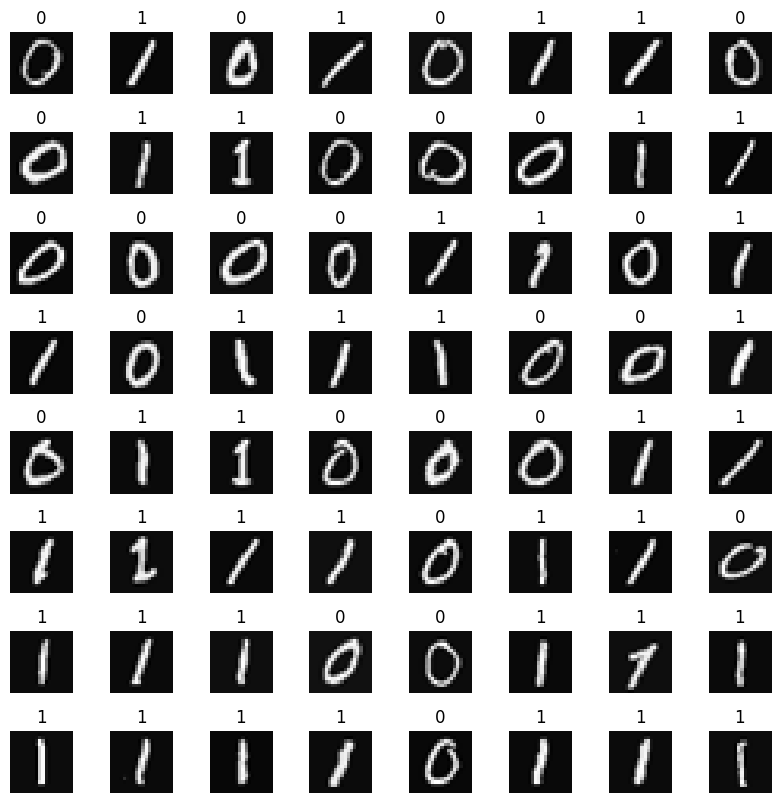

In [26]:
m, n = X.shape

fig, axes = plt.subplots(8, 8, figsize=(8, 8))
fig.tight_layout(pad=0.1)

for i in range(8):
    for j in range(8):
    
        index_random = np.random.randint(m)

        axes[i][j].imshow(X[index_random].reshape((20, 20)).T, cmap='gray')
        axes[i][j].set_title(y[index_random, 0])
        axes[i][j].set_axis_off()

# 3 - Model with Tensorflow

In [31]:
# difine model
model = Sequential([
    Input(shape=(400, ), name='Input_layer'),
    Dense(units=25, activation='sigmoid', name='Layer_1'),
    Dense(units=15, activation='sigmoid', name='Layer_2'),
    Dense(units=1, activation='sigmoid', name='Layer_3')
], name='My_model')

In [32]:
model.summary()

Model: "My_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Layer_1 (Dense)             (None, 25)                10025     
                                                                 
 Layer_2 (Dense)             (None, 15)                390       
                                                                 
 Layer_3 (Dense)             (None, 1)                 16        
                                                                 
Total params: 10,431
Trainable params: 10,431
Non-trainable params: 0
_________________________________________________________________


In [38]:
layer1 = model.get_layer('Layer_1')
layer2 = model.get_layer('Layer_2')
layer3 = model.get_layer('Layer_3')

In [43]:
W1, b1 = layer1.get_weights()
W2, b2 = layer2.get_weights()
W3, b3 = layer3.get_weights()
print(f'shape of W1 and b1 --> {W1.shape, b1.shape}')
print(f'shape of W2 and b2 --> {W2.shape, b2.shape}')
print(f'shape of W3 and b3 --> {W3.shape, b3.shape}')

shape of W1 and b1 --> ((400, 25), (25,))
shape of W2 and b2 --> ((25, 15), (15,))
shape of W3 and b3 --> ((15, 1), (1,))


In [44]:
model.compile(
    loss = BinaryCrossentropy(),
    optimizer = Adam(learning_rate=0.001)
)

model.fit(X, y, epochs=20)

Epoch 1/20
32/32 [==============================] - 0s 1ms/step - loss: 0.6871
Epoch 2/20
32/32 [==============================] - 0s 1ms/step - loss: 0.5843
Epoch 3/20
32/32 [==============================] - 0s 1ms/step - loss: 0.4514
Epoch 4/20
32/32 [==============================] - 0s 1ms/step - loss: 0.3200
Epoch 5/20
32/32 [==============================] - 0s 2ms/step - loss: 0.2241
Epoch 6/20
32/32 [==============================] - 0s 1ms/step - loss: 0.1628
Epoch 7/20
32/32 [==============================] - 0s 1ms/step - loss: 0.1242
Epoch 8/20
32/32 [==============================] - 0s 1ms/step - loss: 0.0988
Epoch 9/20
32/32 [==============================] - 0s 1ms/step - loss: 0.0810
Epoch 10/20
32/32 [==============================] - 0s 1ms/step - loss: 0.0680
Epoch 11/20
32/32 [==============================] - 0s 2ms/step - loss: 0.0584
Epoch 12/20
32/32 [==============================] - 0s 1ms/step - loss: 0.0508
Epoch 13/20
32/32 [==============================

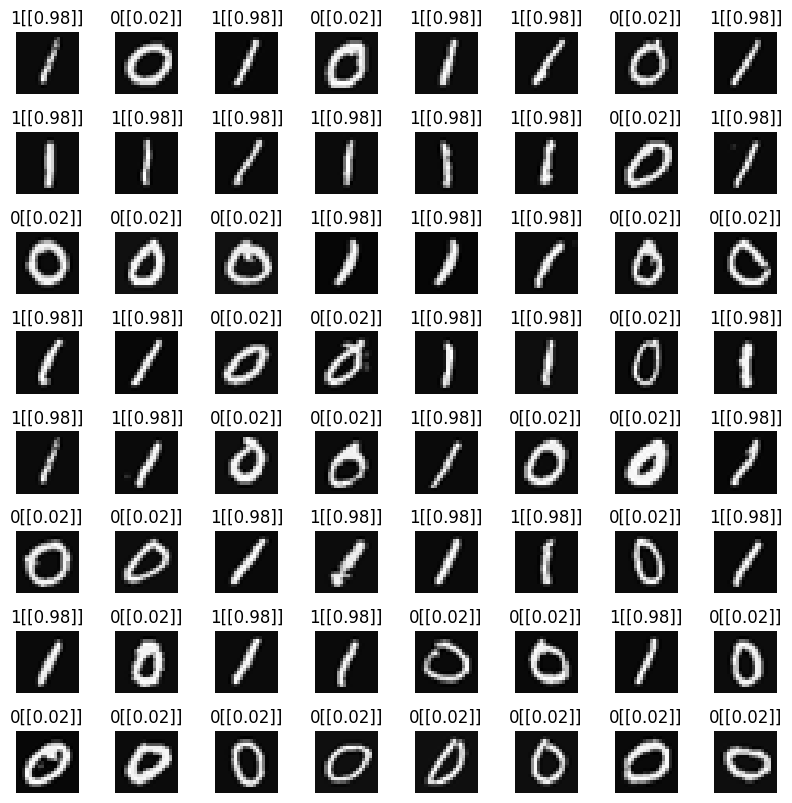

In [51]:
# predict
m, n = X.shape

fig, axes = plt.subplots(8, 8, figsize=(8, 8))
fig.tight_layout(pad=0.1)

for i in range(8):
    for j in range(8):
    
        index_random = np.random.randint(m)

        axes[i][j].imshow(X[index_random].reshape((20, 20)).T, cmap='gray')
        axes[i][j].set_title(str(y[index_random, 0]) + str(np.round(model.predict(X[index_random].reshape(1, 400)), decimals=2)))
        axes[i][j].set_axis_off()

# 4 - Model with Numpy

In [52]:
def dense(A_in, W, b, g):
    
    A_out = g(np.dot(A_in, W) + b)
    return A_out

In [58]:
def sequential(X, W1, b1, W2, b2, W3, b3):
    
    A1 = dense(X, W1, b1, sigmoid)
    A2 = dense(A1, W2, b2, sigmoid)
    A3 = dense(A2, W3, b3, sigmoid)
    return A3

In [59]:
W1_tmp,b1_tmp = layer1.get_weights()
W2_tmp,b2_tmp = layer2.get_weights()
W3_tmp,b3_tmp = layer3.get_weights()

In [60]:
Prediction = sequential(X, W1_tmp, b1_tmp, W2_tmp, b2_tmp, W3_tmp, b3_tmp )
Prediction.shape

(1000, 1)

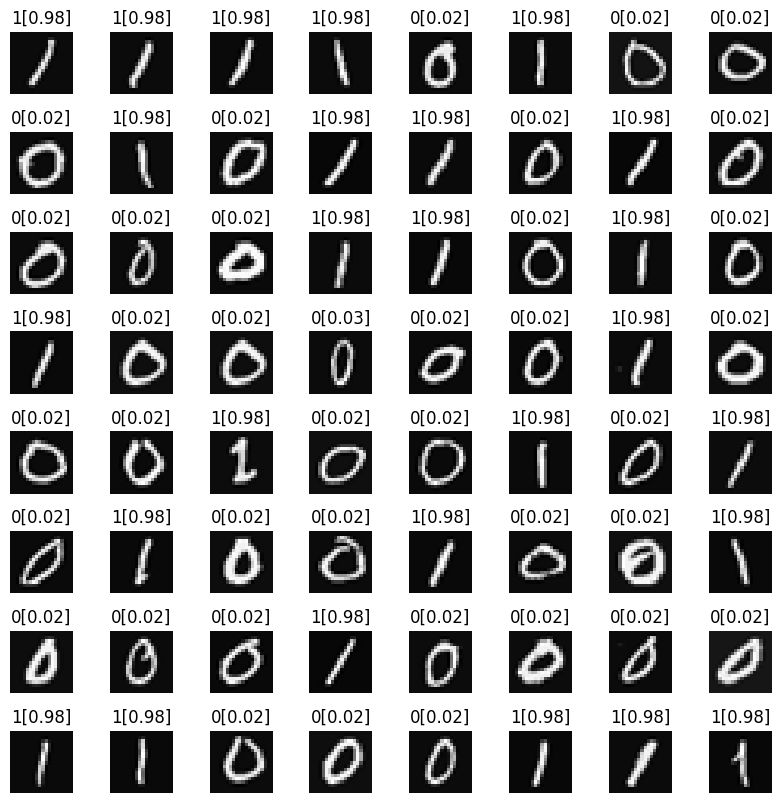

In [62]:
# predict
m, n = X.shape

fig, axes = plt.subplots(8, 8, figsize=(8, 8))
fig.tight_layout(pad=0.1)

for i in range(8):
    for j in range(8):
    
        index_random = np.random.randint(m)

        axes[i][j].imshow(X[index_random].reshape((20, 20)).T, cmap='gray')
        axes[i][j].set_title(str(y[index_random, 0]) + str(np.round(Prediction[index_random], decimals=2)))
        axes[i][j].set_axis_off()